Intro: In this project, we decided to define the 'Best' neighborhood as one that can provide the highest overall quality of life for its residents who live in it. It's based on three submetrics: Mobility, Safety, and School Quality. The reason that we chose these three is that we believe these are just a few of the most important submetrics that can contribute to a high quality of life for people.

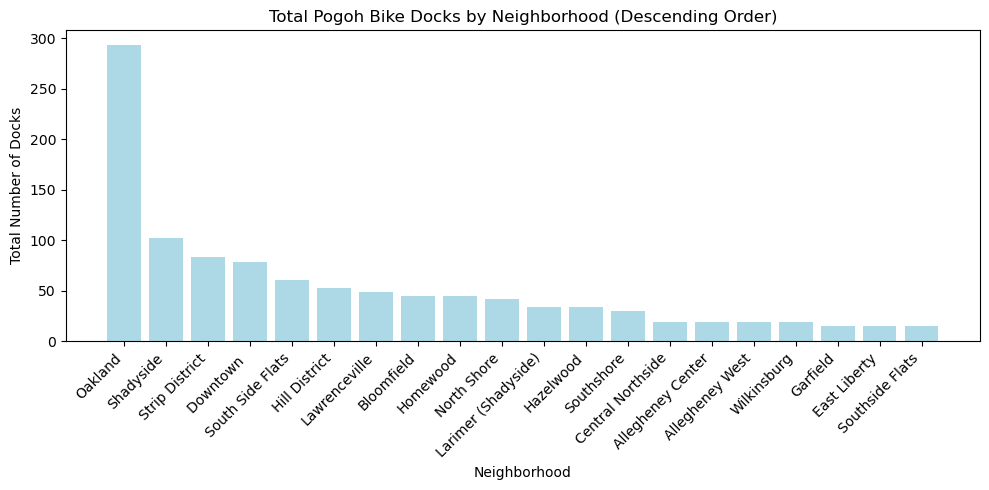

In [5]:
#importing pandas and the matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#read and load the dataset
bikeData = pd.read_csv("POGOH_Station_Locations.csv")

#Group by neighborhood and sum the total amount of docks per neighborhood
docksPerHood = (bikeData.groupby("Neighborhood")["Total Docks"].sum().reset_index())

#Now here I'm sorting the neighborhood by total docks in descending order
docksPerHood = docksPerHood.sort_values("Total Docks", ascending=False)

#Creating the bar chart now
plt.figure(figsize=(10,5))
plt.bar(docksPerHood["Neighborhood"], docksPerHood["Total Docks"], color="lightblue")

#Rotate the labels and then now display everything
plt.xticks(rotation=45, ha="right")
plt.title("Total Pogoh Bike Docks by Neighborhood (Descending Order)")
plt.xlabel("Neighborhood")
plt.ylabel("Total Number of Docks")
plt.tight_layout()
plt.show()

Explanation: To measure mobility across Pittsburgh neighborhoods, I decided to analyze the distribution of the POGOH bike share stations and the total number of docks that are at each location. This dataset is recent and is a representation of data from October of 2025. Since each dock represents a potential bike pickup or drop-off opportunity, neighborhoods with more docks provide better access to sustainable, non-car transportation.

Some of the top neighborhoods include Oakland, Shadyside, the Strip District, and Downtown Pittsburgh; some of the lower neighborhoods include Southside flats, East Liberty, and Garfield. Oakland is the clear winner, with close to 300 docks, while the lower ones don't have more than 15-20. That's not to say that this is a low number however, since not every neighborhood is present on this list, if a neighborhood even makes this list it is enough to show that there is some good score for mobility.



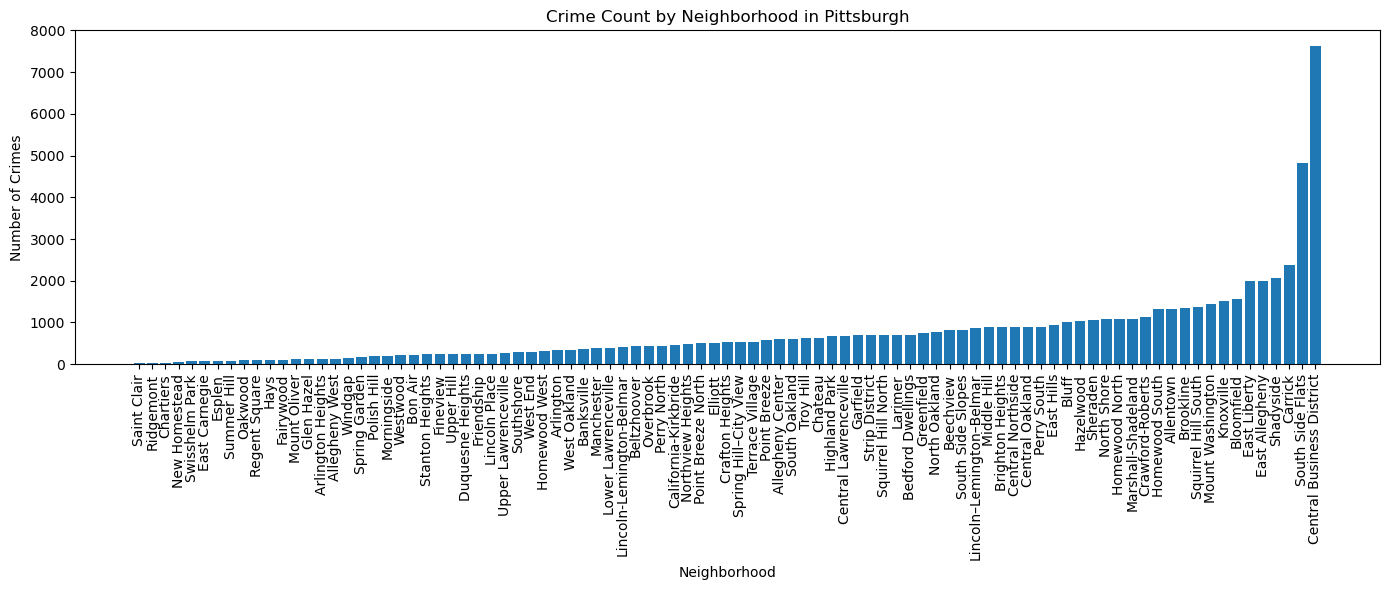

,Neighborhood,Crime_Count
68,Saint Clair,25
67,Ridgemont,34
20,Chartiers,39
55,New Homestead,55
82,Swisshelm Park,71
...,...,...
25,East Allegheny,2002
69,Shadyside,2076
15,Carrick,2388
72,South Side Flats,4814


In [7]:
#import pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#loading datasets

df = pd.read_csv(
    "https://data.wprdc.org/datastore/dump/bd41992a-987a-4cca-8798-fbe1cd946b07?bom=True",
    low_memory=False
)

#Head

df.head()

#Clean Data

df = df.dropna(subset=["Neighborhood"])

#Count Crimes Per Neighborhood

crime_counts = df.groupby("Neighborhood")["Report_Number"].count().reset_index()
crime_counts.columns = ["Neighborhood", "Crime_Count"]

# 6. Sort Neighborhoods by Crime Count (Safest to Most Crime)
crime_counts_sorted = crime_counts.sort_values(by="Crime_Count", ascending=True)

# Show the top 10 safest neighborhoods
crime_counts_sorted.head(10)


#Identify the Safest Neighborhood
safest = crime_counts_sorted.iloc[0]
safest

#Bar Chart 
plt.figure(figsize=(14, 6))
plt.bar(crime_counts_sorted["Neighborhood"], crime_counts_sorted["Crime_Count"])
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Crimes")
plt.title("Crime Count by Neighborhood in Pittsburgh")
plt.tight_layout()
plt.show()


#.....

crime_counts_sorted


Conclusion: Based on my metric of total crime count, Saint Clair stands out as the safest neighborhood in Pittsburgh, with only 25 reported incidents. After analyzing and cleaning the dataset, grouping the data by neighborhood, and ranking each area by crime count, the pattern became clear—some neighborhoods have extremely low crime while others, like the Central Business District, have much higher totals.

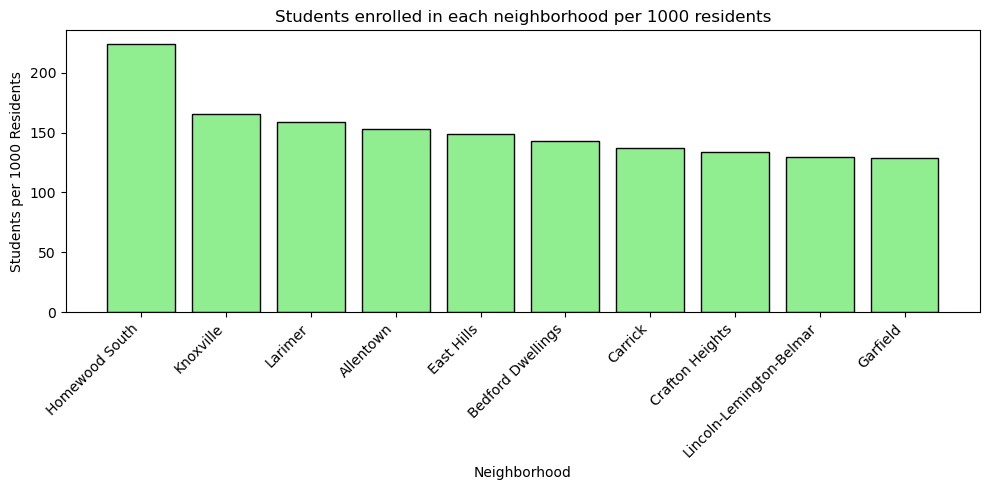

In [8]:
#import pandas and matplotlib
import matplotlib.pyplot as plt
import pandas as pd

#loading datasets
enrollment = pd.read_csv("neighborhood_enrollment.csv")
population = pd.read_csv("neighborhood population.csv")

#enrollment dataset
enrollment = enrollment[["neighborhood", "total_students_enrolled"]].copy()
enrollment["total_students_enrolled"] = pd.to_numeric(enrollment["total_students_enrolled"], errors="coerce")
enrollment = enrollment.dropna(subset=["total_students_enrolled"])
neighborhood_totals = (enrollment.groupby("neighborhood")["total_students_enrolled"].sum().reset_index())

#population dataset
population = population[["AreaName", "Var_2023_TotalPopulation"]].copy()
population.columns = ["neighborhood", "population"]

#merge both datasets
merged = pd.merge(neighborhood_totals, population, on="neighborhood", how="inner")

merged["students_per_1000_residents"] = merged["total_students_enrolled"] / merged["population"] * 1000

#sort the new dataset from highest to lowest
merged_sorted = merged.sort_values("students_per_1000_residents",ascending=False)

#extracting the top 10
top10 = merged_sorted.head(10)

#creating the bar chart 
plt.figure(figsize=(10, 5))
plt.bar(top10["neighborhood"], top10["students_per_1000_residents"], color="lightgreen", edgecolor="black")

#labels
plt.xlabel("Neighborhood")
plt.ylabel("Students per 1000 Residents")
plt.title("Students enrolled in each neighborhood per 1000 residents")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.show()

Conclusion overall: So overall, we all had three very different submetrics with three different clear winners, so we had to take a look at the data and see which neighborhoods overlapped. Our answer for the best neighborhood in Pittsburgh is Larimer. Larimer has a good mobility score, with close to 50 POGOH bike docks. Larimer has the third-highest school enrollment by population density. Larimer has an OKAY rating on crime, not the best but certainly not the worst, coming in at 1000 for the month for the neighborhood. So in conclusion, we found the neighborhood of Larimer to be the best overall neighborhood for the city of Pittsburgh because it fits our definition of bestness, which is good mobility, good safety, and good public schools.